# CASE STUDY: SUBSCRIPTION PRODUCTS
# Brilliant

# STEP #1 IMPORTING LIBRARIES AND DATA

In [10]:
# Importing Libraries
import pandas as pd
import numpy as np
import random
import seaborn as sn
import matplotlib.pyplot as plt

In [11]:
# Importing Data
dataset = pd.read_csv('data/new_churn_data.csv')

## Data Preprocessing

In [12]:
#Data preparation
user_identifier = dataset['user']
dataset = dataset.drop(columns = ['user'])

## One Hot Encoding

In [13]:
dataset.housing.value_counts()

R     9221
na    7910
O     1834
Name: housing, dtype: int64

In [14]:
dataset.groupby('housing')['churn'].nunique().reset_index()

,housing,churn
0,O,2
1,R,2
2,na,2


In [15]:
dataset = pd.get_dummies(dataset)

In [16]:
dataset.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [17]:
dataset = dataset.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])

In [20]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = 'churn'), dataset['churn'],
                                                    test_size = 0.2,
                                                    random_state = 0)

In [21]:
# Balancing the Training Set
y_train.value_counts()

0    8934
1    6238
Name: churn, dtype: int64

In [22]:
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

In [23]:
if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

In [24]:
random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

In [25]:
X_train = X_train.loc[new_indexes,]
y_train = y_train[new_indexes]

In [27]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [28]:
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))

In [29]:
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

In [30]:
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

In [32]:
X_train = X_train2
X_test = X_test2

In [33]:
X_train

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
12462,-1.274840,-0.398746,-0.308336,-0.482216,-0.398531,-0.176586,-1.129542,-0.07931,-0.092623,-0.687260,...,-0.321842,-0.161466,-0.296474,-0.313432,3.415551,-0.299185,-0.278330,-0.288562,-0.299503,-0.313432
11435,0.513694,-0.398746,-0.308336,-0.702543,-0.398531,3.554290,1.668415,1.29687,-0.092623,1.215880,...,-0.321842,-0.161466,-0.296474,-0.313432,-0.292779,-0.299185,-0.278330,-0.288562,-0.299503,-0.313432
14021,-0.643593,-0.398746,-0.308336,-0.702543,-0.398531,-0.176586,0.365723,-0.07931,-0.092623,-0.458883,...,-0.321842,-0.161466,-0.296474,-0.313432,3.415551,-0.299185,-0.278330,-0.288562,-0.299503,-0.313432
18149,-0.643593,-0.398746,-0.308336,-0.702543,-0.398531,-0.176586,0.252445,-0.07931,-0.092623,-0.458883,...,-0.321842,-0.161466,-0.296474,-0.313432,-0.292779,-0.299185,-0.278330,3.465456,-0.299503,-0.313432
12266,1.144941,-0.398746,-0.308336,-0.504248,-0.398531,-0.176586,-0.835020,-0.07931,-0.092623,-0.382758,...,-0.321842,-0.161466,-0.296474,-0.313432,-0.292779,-0.299185,-0.278330,-0.288562,-0.299503,-0.313432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8901,-0.222761,0.509259,0.563164,0.971944,0.527099,-0.176586,0.750867,-0.07931,-0.092623,-0.306632,...,-0.321842,-0.161466,-0.296474,-0.313432,-0.292779,-0.299185,-0.278330,-0.288562,-0.299503,3.190488
16499,1.039733,-0.398746,-0.308336,1.258369,-0.398531,-0.176586,0.569622,-0.07931,-0.092623,-0.154381,...,-0.321842,-0.161466,-0.296474,-0.313432,-0.292779,-0.299185,-0.278330,-0.288562,-0.299503,3.190488
13822,-0.222761,-0.398746,-0.308336,0.773649,-0.398531,-0.176586,0.524311,-0.07931,-0.092623,-0.230506,...,-0.321842,-0.161466,-0.296474,-0.313432,-0.292779,-0.299185,-0.278330,-0.288562,-0.299503,-0.313432
6036,-1.380048,-0.398746,-0.308336,-0.702543,-0.398531,-0.176586,0.161823,-0.07931,-0.092623,-0.535009,...,-0.321842,-0.161466,-0.296474,-0.313432,-0.292779,3.342410,-0.278330,-0.288562,-0.299503,-0.313432


# STEP #2 MODEL BUILDING

In [34]:
# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [35]:
# Predicting Test Set
y_pred = classifier.predict(X_test)

In [36]:
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [37]:
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.6353809649354073

In [38]:
precision_score(y_test, y_pred)

0.5421464762782128

In [39]:
recall_score(y_test, y_pred) 

0.7515964240102171

In [40]:
f1_score(y_test, y_pred)

0.6299170457586298

Test Data Accuracy: 0.6354


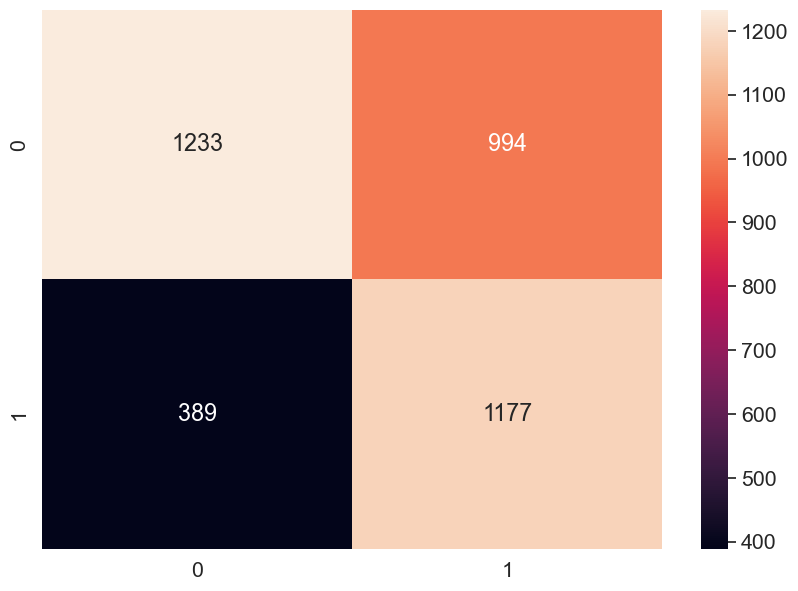

In [41]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))